In [1]:
!pip install openpyxl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

arquivos = ['/content/grupo 14 (revisado).xlsx', '/content/grupo 1 (revisado).xlsx', '/content/grupo 7 (revisado).xlsx', '/content/grupo 8 (revisado).xlsx']

df_list = [pd.read_excel(arquivo) for arquivo in arquivos]
df = pd.concat(df_list, ignore_index=True)
df.to_excel('/content/combined_data.xlsx', index=False)



In [3]:
import pandas as pd
import matplotlib.pyplot as plt

print(df.head())

print(df.info())

print(df.describe())

print(df.isnull().sum())

# Contar palavras na coluna 0
df['word_count'] = df.iloc[:, 0].apply(lambda x: len(str(x).split()))
total_words = df['word_count'].sum()

print(f"Total de palavras: {total_words}")

# # Plotar a distribuição do número de palavras por fala
# plt.hist(df['word_count'], bins=20, edgecolor='black')
# plt.title('Distribuição do Número de Palavras por Fala')
# plt.xlabel('Número de Palavras')
# plt.ylabel('Frequência')
# plt.show()

total_falas = len(df)

print(f"Total de falas: {total_falas}")

total_pessoas = df.iloc[:, 1].nunique()

print(f"Total de pessoas: {total_pessoas}")

# Contar disfluências
df['hes_count'] = df.iloc[:, 0].str.count('<hes')
df['erro_count'] = df.iloc[:, 0].str.count('<erro')
df['rep_count'] = df.iloc[:, 0].str.count('<rep')

total_hes = df['hes_count'].sum()
total_erro = df['erro_count'].sum()
total_rep = df['rep_count'].sum()

print(f"Total de <hes: {total_hes}")
print(f"Total de <erro: {total_erro}")
print(f"Total de <rep: {total_rep}")







                                          Unnamed: 0      debater start_time  \
0                                 Gravação iniciada.    moderador       0.75   
1  Minha identificação é o número aluno um, estou...  debatedor 1       3.51   
2  Minha identificação identificação é aluno 2, e...  debatedor 2      11.87   
3  Minha identificação é a número 3. Estou contri...  debatedor 3      17.47   
4  Minha eficação é o número 4. Estou contribuind...  debatedor 4      22.75   

  end_time transcription DisplayText  
0      3.0           NaN         NaN  
1     9.59           NaN         NaN  
2    15.99           NaN         NaN  
3    21.63           NaN         NaN  
4    26.47           NaN         NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     47 non-null     object
 1   debater        212 non-null    object
 2   star

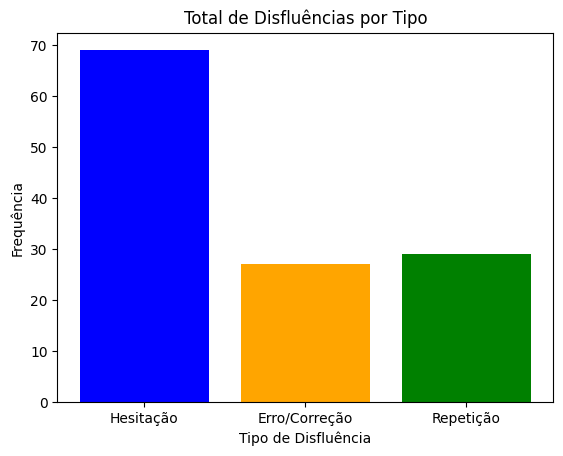

In [4]:
# Gráfico de barras para a contagem total de cada tipo de disfluência
disfluencias_totais = {
    'Hesitação': total_hes,
    'Erro/Correção': total_erro,
    'Repetição': total_rep
}

plt.bar(disfluencias_totais.keys(), disfluencias_totais.values(), color=['blue', 'orange', 'green'])
plt.title('Total de Disfluências por Tipo')
plt.xlabel('Tipo de Disfluência')
plt.ylabel('Frequência')
plt.show()

Participante com mais disfluências: debatedor 2 (50.0 disfluências)


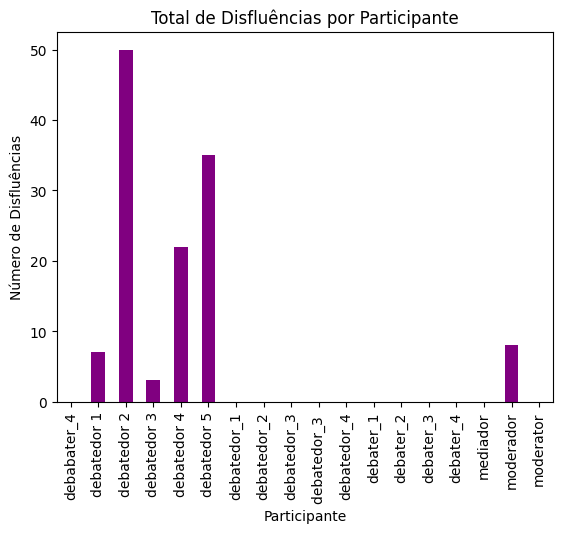

In [5]:
# Somar disfluências por participante
df['total_disfluencias'] = df['hes_count'] + df['erro_count'] + df['rep_count']
disfluencias_por_participante = df.groupby(df.columns[1])['total_disfluencias'].sum()

# Encontrar o participante com o maior número de disfluências
maior_disfluente = disfluencias_por_participante.idxmax()
maior_numero_disfluencias = disfluencias_por_participante.max()

print(f"Participante com mais disfluências: {maior_disfluente} ({maior_numero_disfluencias} disfluências)")

# Gráfico de barras para disfluências por participante
disfluencias_por_participante.plot(kind='bar', color='purple')
plt.title('Total de Disfluências por Participante')
plt.xlabel('Participante')
plt.ylabel('Número de Disfluências')
plt.show()

<ipython-input-6-39c7c0d844bf>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (palavras_por_participante[i], disfluencias_por_participante[i]))


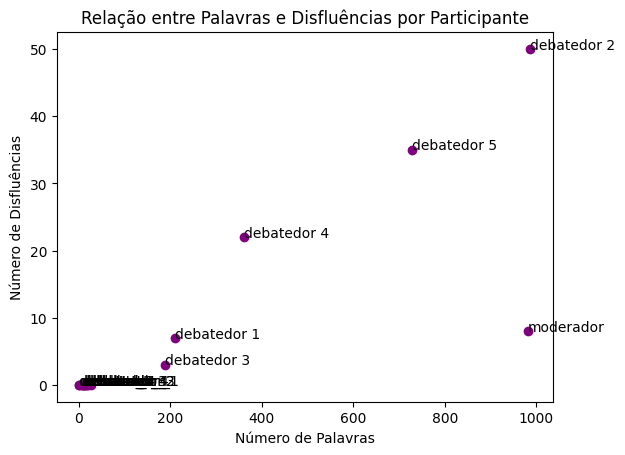

In [6]:

# Contar palavras por participante
palavras_por_participante = df.groupby(df.columns[1])['word_count'].sum()

# Plotar gráfico de dispersão: Palavras vs. Disfluências por participante
plt.scatter(palavras_por_participante, disfluencias_por_participante, color='purple')
plt.title('Relação entre Palavras e Disfluências por Participante')
plt.xlabel('Número de Palavras')
plt.ylabel('Número de Disfluências')
for i, txt in enumerate(palavras_por_participante.index):
    plt.annotate(txt, (palavras_por_participante[i], disfluencias_por_participante[i]))
plt.show()

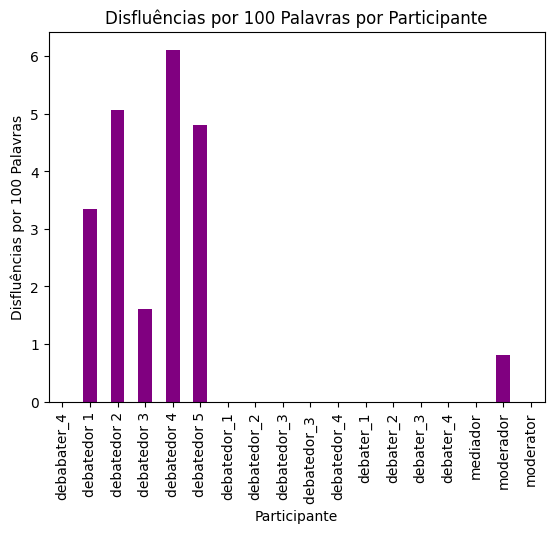

              word_count  total_disfluencias  disfluencias_por_100_palavras
debater                                                                    
debabater_4            1                 0.0                       0.000000
debatedor 1          209                 7.0                       3.349282
debatedor 2          987                50.0                       5.065856
debatedor 3          187                 3.0                       1.604278
debatedor 4          360                22.0                       6.111111
debatedor 5          729                35.0                       4.801097
debatedor_1           27                 0.0                       0.000000
debatedor_2           18                 0.0                       0.000000
debatedor_3           19                 0.0                       0.000000
debatedor_3            1                 0.0                       0.000000
debatedor_4            6                 0.0                       0.000000
debater_1   

In [7]:
# Contar palavras na coluna 0
df['word_count'] = df.iloc[:, 0].apply(lambda x: len(str(x).split()))

# Contar disfluências
df['hes_count'] = df.iloc[:, 0].str.count('<hes')
df['erro_count'] = df.iloc[:, 0].str.count('<erro')
df['rep_count'] = df.iloc[:, 0].str.count('<rep')
df['total_disfluencias'] = df['hes_count'] + df['erro_count'] + df['rep_count']

# Agrupar por participante
grupo_participante = df.groupby('debater').agg({'word_count': 'sum', 'total_disfluencias': 'sum'})

# Calcular disfluências por 100 palavras
grupo_participante['disfluencias_por_100_palavras'] = (grupo_participante['total_disfluencias'] / grupo_participante['word_count']) * 100

# Plotar gráfico de barras
grupo_participante['disfluencias_por_100_palavras'].plot(kind='bar', color='purple')
plt.title('Disfluências por 100 Palavras por Participante')
plt.xlabel('Participante')
plt.ylabel('Disfluências por 100 Palavras')
plt.show()

print(grupo_participante)

<ipython-input-8-5ca82520ade7>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (grupo_participante['word_count'][i], grupo_participante['disfluencias_por_100_palavras'][i]))


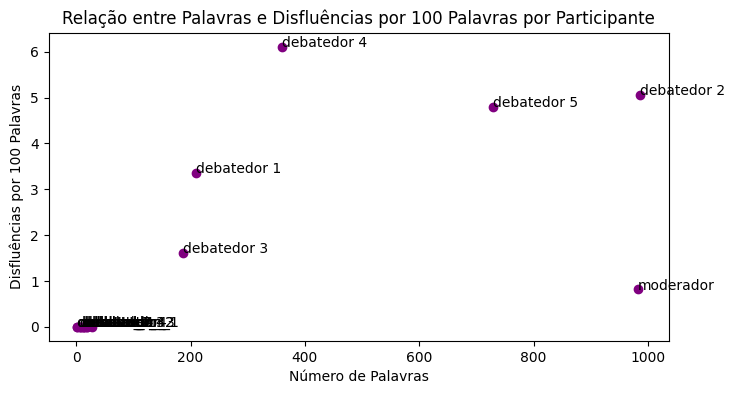

              word_count  total_disfluencias  disfluencias_por_100_palavras
debater                                                                    
debabater_4            1                 0.0                       0.000000
debatedor 1          209                 7.0                       3.349282
debatedor 2          987                50.0                       5.065856
debatedor 3          187                 3.0                       1.604278
debatedor 4          360                22.0                       6.111111
debatedor 5          729                35.0                       4.801097
debatedor_1           27                 0.0                       0.000000
debatedor_2           18                 0.0                       0.000000
debatedor_3           19                 0.0                       0.000000
debatedor_3            1                 0.0                       0.000000
debatedor_4            6                 0.0                       0.000000
debater_1   

In [8]:
# Plotar gráfico de dispersão
plt.figure(figsize=(8, 4))
plt.scatter(grupo_participante['word_count'], grupo_participante['disfluencias_por_100_palavras'], color='purple')
plt.title('Relação entre Palavras e Disfluências por 100 Palavras por Participante')
plt.xlabel('Número de Palavras')
plt.ylabel('Disfluências por 100 Palavras')

# Adicionar rótulos aos pontos
for i, txt in enumerate(grupo_participante.index):
    plt.annotate(txt, (grupo_participante['word_count'][i], grupo_participante['disfluencias_por_100_palavras'][i]))

plt.show()

print(grupo_participante)

In [9]:
# Proporção de disfluências por palavra
total_disfluencias = total_hes + total_erro + total_rep
proporcao_disfluencias_palavra = total_disfluencias / total_words

print(f"Proporção de disfluências por palavra: {proporcao_disfluencias_palavra:.2%}\nEm média,  {proporcao_disfluencias_palavra:.2%} das palavras nas falas analisadas são disfluências.")

# Proporção de disfluências por fala
proporcao_disfluencias_fala = total_disfluencias / total_falas

print(f"Proporção de disfluências por fala: {proporcao_disfluencias_fala:.2f}\nEm média, há {proporcao_disfluencias_fala:.2f} disfluências por fala.")

Proporção de disfluências por palavra: 3.48%
Em média,  3.48% das palavras nas falas analisadas são disfluências.
Proporção de disfluências por fala: 0.58
Em média, há 0.58 disfluências por fala.


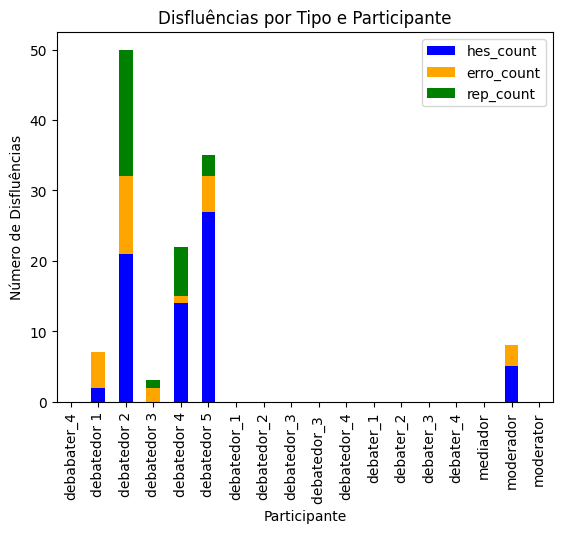

In [10]:
# Gráfico de barras empilhadas para disfluências por tipo e participante
df_disfluencias_tipo = df.groupby(df.columns[1])[['hes_count', 'erro_count', 'rep_count']].sum()
df_disfluencias_tipo.plot(kind='bar', stacked=True, color=['blue', 'orange', 'green'])
plt.title('Disfluências por Tipo e Participante')
plt.xlabel('Participante')
plt.ylabel('Número de Disfluências')
plt.show()

# Todos os Grupos

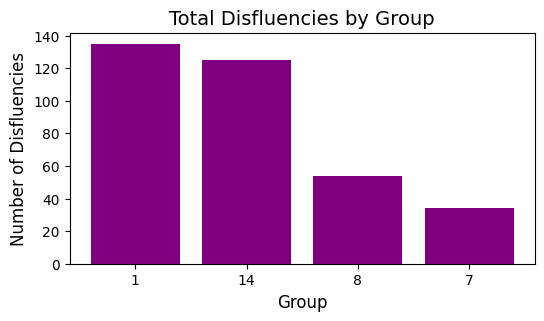

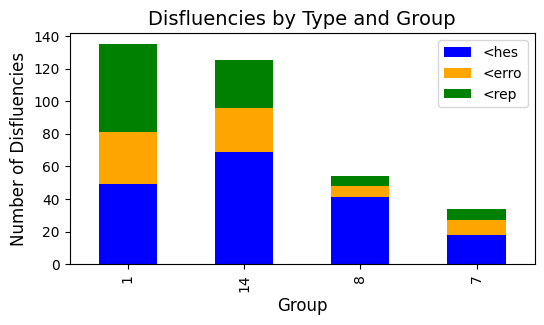

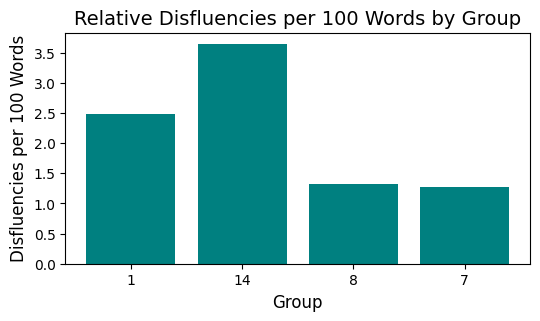

15602


In [11]:

import pandas as pd
import matplotlib.pyplot as plt

# List of Excel files
files = ['/content/grupo 1 (revisado).xlsx', '/content/grupo 14 (revisado).xlsx',
         '/content/grupo 8 (revisado).xlsx', '/content/grupo 7 (revisado).xlsx']

# Dictionaries to store the total number of disfluencies per group
total_disfluencies = {}
disfluencies_by_type = {'<hes': {}, '<erro': {}, '<rep': {}}

# Dictionary to store relative disfluencies per group
relative_disfluencies_per_group = {}
total = 0

# Iterate over each file and process
for file in files:
    # Load the DataFrame
    df = pd.read_excel(file)

    # Count disfluencies
    hes_count = df.iloc[:, 0].str.count('<hes').sum()
    erro_count = df.iloc[:, 0].str.count('<erro').sum()
    rep_count = df.iloc[:, 0].str.count('<rep').sum()

    # Count words in column 0
    total_words = df.iloc[:, 0].apply(lambda x: len(str(x).split())).sum()
    total += total_words

    # Group name based on the file
    group = file.split('/')[-1].split(' ')[1]

    # Store the total number of disfluencies per group
    total_disfluencies[group] = hes_count + erro_count + rep_count

    # Store disfluencies by type
    disfluencies_by_type['<hes'][group] = hes_count
    disfluencies_by_type['<erro'][group] = erro_count
    disfluencies_by_type['<rep'][group] = rep_count

    # Calculate disfluencies per 100 words
    disfluencies_per_100_words = (total_disfluencies[group] / total_words) * 100

    # Store relative disfluencies per group
    relative_disfluencies_per_group[group] = disfluencies_per_100_words

# Plot bar graph for total disfluencies per group
plt.figure(figsize=(6, 3))  # Smaller figure size
plt.bar(total_disfluencies.keys(), total_disfluencies.values(), color='purple')
plt.title('Total Disfluencies by Group', fontsize=14)  # Larger title
plt.xlabel('Group', fontsize=12)
plt.ylabel('Number of Disfluencies', fontsize=12)
plt.savefig('/content/total_disfluencies.png', dpi=300)
plt.show()

# Plot stacked bar graph for disfluencies by type and group
df_disfluencies_type = pd.DataFrame(disfluencies_by_type)
df_disfluencies_type.plot(kind='bar', stacked=True, color=['blue', 'orange', 'green'], figsize=(6, 3))
plt.title('Disfluencies by Type and Group', fontsize=14)  # Larger title
plt.xlabel('Group', fontsize=12)
plt.ylabel('Number of Disfluencies', fontsize=12)
plt.savefig('/content/disfluencies_by_type.png', dpi=300)
plt.show()

# Plot bar graph for relative disfluencies per 100 words by group
plt.figure(figsize=(6, 3))  # Smaller figure size
plt.bar(relative_disfluencies_per_group.keys(), relative_disfluencies_per_group.values(), color='teal')
plt.title('Relative Disfluencies per 100 Words by Group', fontsize=14)  # Larger title
plt.xlabel('Group', fontsize=12)
plt.ylabel('Disfluencies per 100 Words', fontsize=12)
plt.savefig('/content/relative_disfluencies.png', dpi=300)
plt.show()

print(total)
